# Election data examples

By Ben Welsh

Examples of working with the California elections data published by the California Civic Data Coalition.

In [160]:
import pandas as pd

In [161]:
%matplotlib inline

### Read in data from the Coalition's API

First [candidates](https://calaccess.californiacivicdata.org/documentation/processed-files/candidates/)

In [162]:
candidates = pd.read_csv("https://calaccess.download/latest/Candidates.csv")

In [163]:
candidates.head()

,name,party_name,election_name,election_date,office,is_incumbent,special_election,created_at,updated_at,ocd_person_id,ocd_candidacy_id,ocd_election_id,ocd_post_id,ocd_contest_id,ocd_party_id,latest_calaccess_filer_id,calaccess_filer_id_count,latest_form501_filing_id,form501_filing_count
0,KAMALA D. HARRIS,DEMOCRATIC,2026 PRIMARY,2026-06-02,Governor,NaN,f,2017-10-30 23:54:23.795175+00,2017-10-30 23:54:23.824374+00,ocd-person/717b9339-bcaa-437d-8e36-b8417ce02325,ocd-candidacy/320f9fb9-1f0a-44b1-84c0-a07fa54f...,ocd-election/b0d7be16-6f9e-4c5e-a537-c32167bbdbf8,ocd-post/b63d25d2-aff0-4afb-9dd1-e99474c8eb13,ocd-contest/d33b6822-b3b9-4ed5-97db-19c3f16718aa,ocd-organization/169e9416-915b-4462-94cf-82e11...,1313503,1,2149075.0,1.0
1,RAJIV DALAL,DEMOCRATIC,2026 PRIMARY,2026-06-02,Lieutenant Governor,NaN,f,2017-10-30 23:53:58.104137+00,2017-10-30 23:53:58.136437+00,ocd-person/b3a7a574-0b7c-4f1c-9c08-c68aabeef412,ocd-candidacy/7fac375c-011f-4bcf-b3f1-749eee7b...,ocd-election/b0d7be16-6f9e-4c5e-a537-c32167bbdbf8,ocd-post/3497cad1-e09e-4731-97c7-338b76746800,ocd-contest/5ca2421a-6acd-4d5a-924e-0fbb8e7387ab,ocd-organization/169e9416-915b-4462-94cf-82e11...,1376272,1,2053509.0,1.0
2,JIMMY GOMEZ,DEMOCRATIC,2026 PRIMARY,2026-06-02,Lieutenant Governor,NaN,f,2017-10-30 23:54:25.942073+00,2017-10-30 23:54:25.973413+00,ocd-person/f446bd3c-d19b-435c-9fa1-fe2165dfcd52,ocd-candidacy/14e643a7-aaa5-4243-917c-10238cf2...,ocd-election/b0d7be16-6f9e-4c5e-a537-c32167bbdbf8,ocd-post/3497cad1-e09e-4731-97c7-338b76746800,ocd-contest/5ca2421a-6acd-4d5a-924e-0fbb8e7387ab,ocd-organization/169e9416-915b-4462-94cf-82e11...,1334135,1,2181321.0,1.0
3,JOHN A. PEREZ,DEMOCRATIC,2022 PRIMARY,2022-06-07,Lieutenant Governor,NaN,f,2017-10-30 23:53:47.749057+00,2017-10-30 23:53:47.780872+00,ocd-person/5da11996-26f5-4b60-a6ff-95d760badbb4,ocd-candidacy/7d57e357-db8d-4bb0-8c2d-0dd1265e...,ocd-election/f69bfdc3-72b0-4125-8dcf-40a56f55cc1d,ocd-post/3497cad1-e09e-4731-97c7-338b76746800,ocd-contest/fc547f9a-7b67-46d7-8083-7f9070da27a6,ocd-organization/169e9416-915b-4462-94cf-82e11...,1304250,1,2181318.0,1.0
4,JAMES W. SILVA,REPUBLICAN,2022 PRIMARY,2022-06-07,State Senate 34,NaN,f,2017-10-25 02:26:07.003425+00,2017-10-25 02:26:07.032436+00,ocd-person/d3d6c7c8-9dd1-4844-ac46-5d1d61038b07,ocd-candidacy/330fae87-429c-44f0-a97d-12641e74...,ocd-election/f69bfdc3-72b0-4125-8dcf-40a56f55cc1d,ocd-post/2a28ec6a-80f2-4c0f-b4c5-9b99ab61b98a,ocd-contest/5d72c16f-f46f-470f-b2c4-65f428b3b1a4,ocd-organization/731c91f2-7707-4ac5-9943-4fefa...,1241308,1,2164579.0,1.0


### How many candidates?

In [166]:
len(candidates)

7162

### How has that changed over time?

In [167]:
candidates.election_date = pd.to_datetime(candidates.election_date)

In [168]:
def get_cycle(dt):
    if dt.year % 2 == 0:
        return dt.year
    else:
        return dt.year +1

In [169]:
candidates['election_year'] = candidates.election_date.apply(get_cycle)

In [170]:
by_year = candidates.groupby("election_year").size().reset_index()

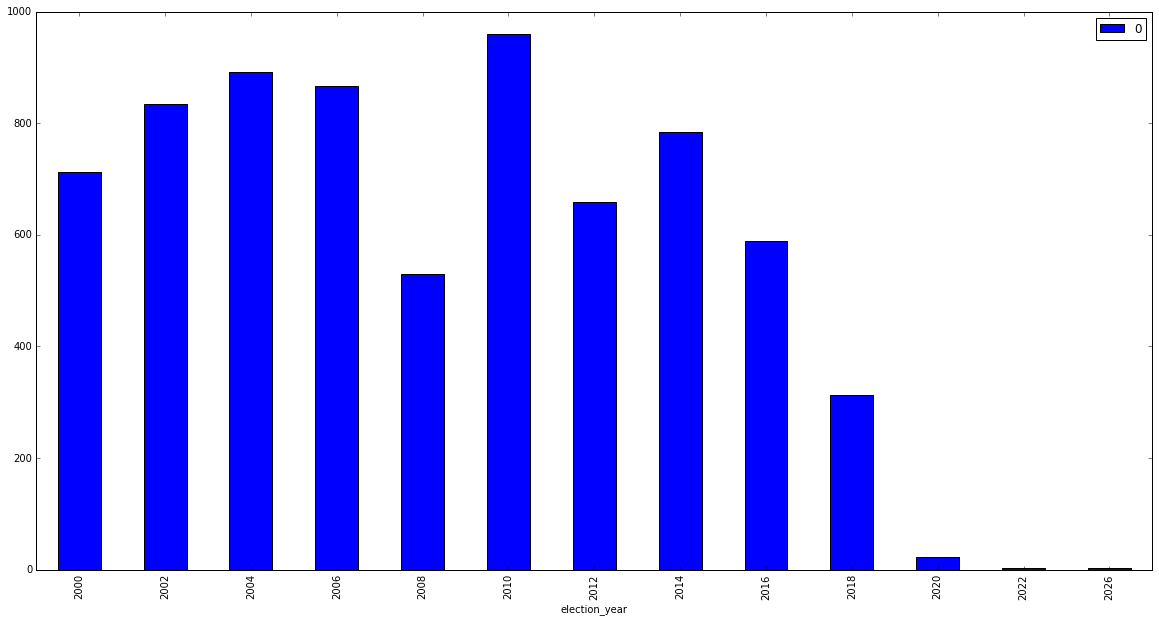

In [171]:
by_year.set_index("election_year").plot.bar(figsize=(20, 10))

### Wow. That's going down. How about the different parties?

In [172]:
by_party = candidates.groupby(["party_name", "election_year"]).size().reset_index()

In [173]:
party_crosstab = by_party.set_index(["election_year", "party_name"]).unstack(1).reset_index().fillna(0)

In [174]:
party_crosstab = party_crosstab.reset_index()
party_crosstab.columns = party_crosstab.columns.droplevel(0)
party_crosstab = party_crosstab.rename_axis(None, axis=1)
party_crosstab = party_crosstab.set_index("")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f62d4b8fd10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f62d441c990>], dtype=object)

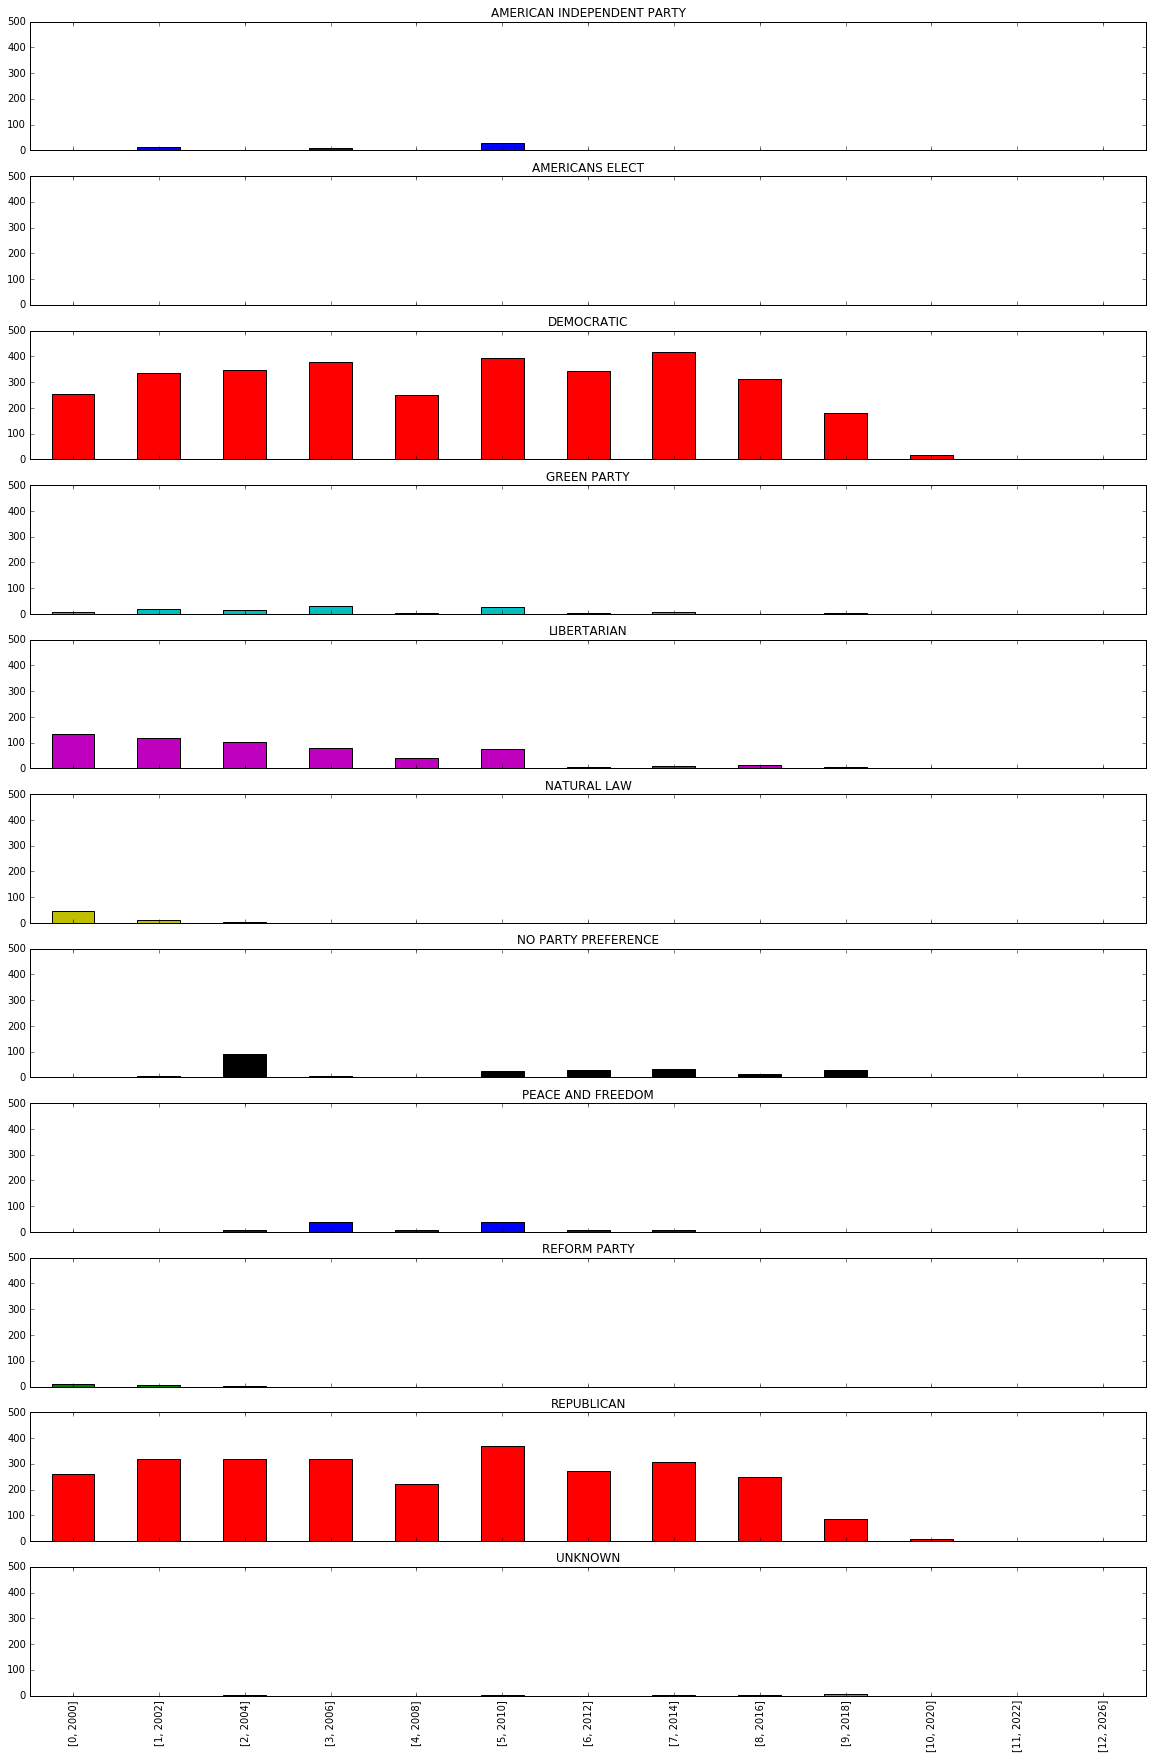

In [189]:
party_crosstab.plot.bar(
    subplots=True,
    figsize=(20, 30),
    legend=False,
    sharey=True,
    ylim=(0, 500)
)

### How do the two major parties compare to the third parties?

In [176]:
candidates['party_type'] = candidates.party_name.apply(lambda x: x if x in ['DEMOCRATIC', 'REPUBLICAN'] else 'THIRD')

In [177]:
by_party_type = candidates.groupby(["party_type", "election_year"]).size().reset_index()

In [178]:
party_type_crosstab = by_party_type.set_index(
    ["election_year", "party_type"]
).unstack(1).reset_index().fillna(0)

In [179]:
party_type_crosstab = party_type_crosstab.reset_index()
party_type_crosstab.columns = ['INDEX', 'YEAR', 'DEMOCRATIC', 'REPUBLICAN', 'THIRD']
party_type_crosstab = party_type_crosstab.rename_axis(None, axis=1)
party_type_crosstab.drop("INDEX", axis=1, inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f62d64e5810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f62d614f9d0>], dtype=object)

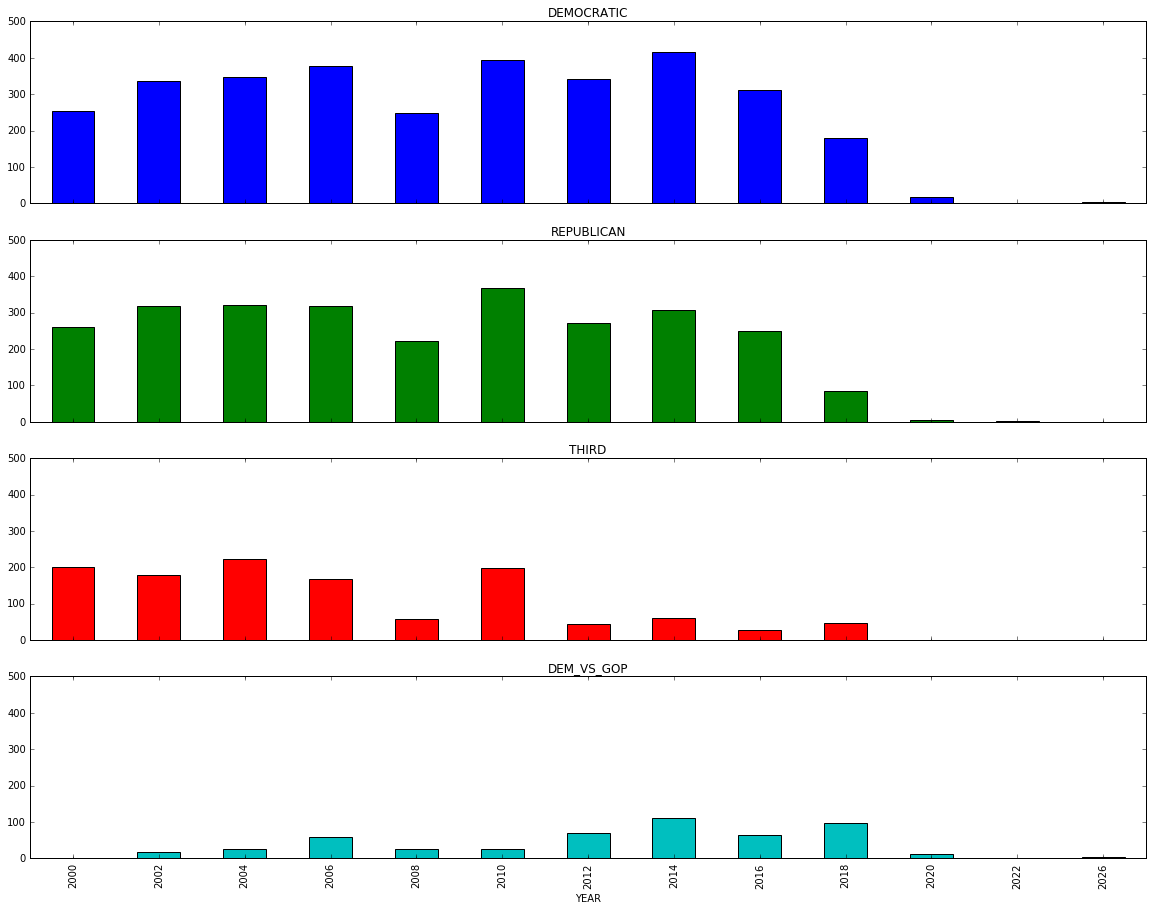

In [186]:
party_type_crosstab.set_index("YEAR").plot.bar(
    subplots=True,
    figsize=(20, 15),
    legend=False,
    sharey=True,
    ylim=(0, 500)
)

In [181]:
party_type_crosstab

,YEAR,DEMOCRATIC,REPUBLICAN,THIRD
0,2000,253.0,259.0,201.0
1,2002,337.0,319.0,178.0
2,2004,347.0,320.0,224.0
3,2006,378.0,319.0,169.0
4,2008,249.0,223.0,57.0
5,2010,394.0,368.0,197.0
6,2012,342.0,271.0,45.0
7,2014,417.0,306.0,61.0
8,2016,312.0,249.0,27.0
9,2018,181.0,85.0,46.0


### How has the gap between the GOP and the Dems changed?

In [182]:
party_type_crosstab['DEM_VS_GOP'] = party_type_crosstab['DEMOCRATIC'] - party_type_crosstab['REPUBLICAN']

In [183]:
party_type_crosstab

,YEAR,DEMOCRATIC,REPUBLICAN,THIRD,DEM_VS_GOP
0,2000,253.0,259.0,201.0,-6.0
1,2002,337.0,319.0,178.0,18.0
2,2004,347.0,320.0,224.0,27.0
3,2006,378.0,319.0,169.0,59.0
4,2008,249.0,223.0,57.0,26.0
5,2010,394.0,368.0,197.0,26.0
6,2012,342.0,271.0,45.0,71.0
7,2014,417.0,306.0,61.0,111.0
8,2016,312.0,249.0,27.0,63.0
9,2018,181.0,85.0,46.0,96.0
